In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df_train = pd.read_excel('Flight_prediction_train.xlsx')
df_test = pd.read_excel('Flight_prediction_test.xlsx')
# parse_dates=['Date_of_Journey', 'Dep_Time', 'Arrival_Time']
# We could not parse_dates as the data is not in correct format. We will extract the required data from string.

In [3]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


Since we have the train and test files separated, we will perform all steps done on training dataset also on test dataset.

In [5]:
df_train.to_csv('Flight_prediction_train.csv')
df_test.to_csv('Flight_prediction_test.csv')

In [6]:
df=df_train.append(df_test, ignore_index=True)
df

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop
...,...,...,...,...,...,...,...,...,...,...,...
13349,No info,Air India,20:25 07 Jun,6/06/2019,20:30,Banglore,23h 55m,NaN,CCU → DEL → BLR,Kolkata,1 stop
13350,No info,IndiGo,16:55,27/03/2019,14:20,Banglore,2h 35m,NaN,CCU → BLR,Kolkata,non-stop
13351,No info,Jet Airways,04:25 07 Mar,6/03/2019,21:50,Cochin,6h 35m,NaN,DEL → BOM → COK,Delhi,1 stop
13352,No info,Air India,19:15,6/03/2019,04:00,Cochin,15h 15m,NaN,DEL → BOM → COK,Delhi,1 stop


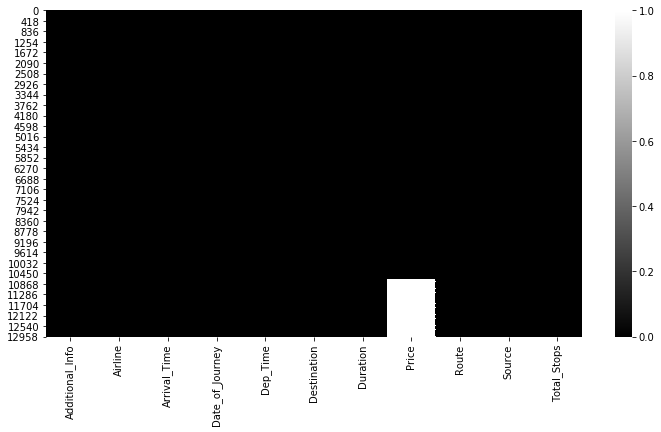

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='gray')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
Additional_Info    13354 non-null object
Airline            13354 non-null object
Arrival_Time       13354 non-null object
Date_of_Journey    13354 non-null object
Dep_Time           13354 non-null object
Destination        13354 non-null object
Duration           13354 non-null object
Price              10683 non-null float64
Route              13353 non-null object
Source             13354 non-null object
Total_Stops        13353 non-null object
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [9]:
df[df['Route'].isna()]

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
9039,No info,Air India,09:25 07 May,6/05/2019,09:45,Cochin,23h 40m,7480.0,NaN,Delhi,NaN


In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observations:
    1. One row with missing values in Route and Total_Stops.
    2. Price has lot of outliers, but required.
    3. Only Price is float value, all others are string and need to be converted later.

In [11]:
# Since year for 'Date_of_Journey' is the same, we don't need it.
df['Journey_Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Journey_Date'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Date_of_Journey'].str.split('/').str[2].unique()
df.drop(columns=['Date_of_Journey'], axis=1, inplace=True)

In [12]:
df.head(5)

,Additional_Info,Airline,Arrival_Time,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops,Journey_Month,Journey_Date
0,No info,IndiGo,01:10 22 Mar,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop,3,24
1,No info,Air India,13:15,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops,5,1
2,No info,Jet Airways,04:25 10 Jun,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops,6,9
3,No info,IndiGo,23:30,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop,5,12
4,No info,IndiGo,21:35,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop,3,1


In [13]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '00:20 07 Mar',
       '00:20 02 Apr', '07:45 13 May'], dtype=object)

Arrival_Time is a mixture of time and date. Some doesn't have date. We can extract time using 'space' split. We can later split it by ':'. We don't need the date in this column.

In [14]:
# Since year for 'Date_of_Journey' is the same, we don't need it.
df['Arrival_Time'] = df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Hour'] = df['Arrival_Time'].str.split(':').str[0].astype(int)
df['Arrival_Min'] = df['Arrival_Time'].str.split(':').str[1].astype(int)
df.drop(columns=['Arrival_Time'], axis=1, inplace=True)

In [15]:
# df['Dep_Time'].unique()
df['Dep_Hour'] = df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_Min'] = df['Dep_Time'].str.split(':').str[1].astype(int)
df.drop(columns=['Dep_Time'], axis=1, inplace=True)

In [16]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [17]:
df[df['Airline']=='Multiple carriers Premium economy']

,Additional_Info,Airline,Destination,Duration,Price,Route,Source,Total_Stops,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
717,No info,Multiple carriers Premium economy,Cochin,11h 45m,10161.0,DEL → BOM → COK,Delhi,1 stop,3,21,19,15,7,30
1799,No info,Multiple carriers Premium economy,Cochin,13h 30m,9845.0,DEL → BOM → COK,Delhi,1 stop,3,21,21,0,7,30
4627,No info,Multiple carriers Premium economy,Cochin,10h 20m,10161.0,DEL → BOM → COK,Delhi,1 stop,3,21,19,15,8,55
4718,No info,Multiple carriers Premium economy,Cochin,15h,9845.0,DEL → BOM → COK,Delhi,1 stop,3,21,21,0,6,0
5090,No info,Multiple carriers Premium economy,Cochin,7h 20m,11269.0,DEL → BOM → COK,Delhi,1 stop,3,21,13,20,6,0
5489,No info,Multiple carriers Premium economy,Cochin,9h 30m,11269.0,DEL → BOM → COK,Delhi,1 stop,3,21,15,30,6,0
5673,No info,Multiple carriers Premium economy,Cochin,12h 50m,14629.0,DEL → BOM → COK,Delhi,1 stop,3,21,18,50,6,0
5836,No info,Multiple carriers Premium economy,Cochin,11h 20m,14629.0,DEL → BOM → COK,Delhi,1 stop,3,21,18,50,7,30
6470,No info,Multiple carriers Premium economy,Cochin,12h 5m,9845.0,DEL → BOM → COK,Delhi,1 stop,3,21,21,0,8,55
6591,No info,Multiple carriers Premium economy,Cochin,6h 35m,11269.0,DEL → BOM → COK,Delhi,1 stop,3,21,15,30,8,55


Observations: All 'Airline' == 'Multiple carriers Premium economy' has same source 'Delhi' and destination 'Cochin' woth one stop at 'BOM' on the same day. Since the departure, arrival time and duration is differnet, we will consider this in our dataset and leave it as it is.

In [18]:
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [19]:
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [20]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [21]:
# We can convert this data to numeric values {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
df['Total_Stops'].replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [22]:
df['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → UDR → DEL → HYD             1
BOM → VNS → DEL → HYD             1
CCU → RPR → HYD → BLR             1
BOM → COK → MAA → HYD             1
BOM → JDH → JAI → DEL → HYD       1
Name: Route, Length: 132, dtype: int64

In [23]:
data = df['Route'].str.split(' → ', expand=True)
lst = ['Route0', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5']
data.columns = lst
data.fillna('None', inplace=True)
df = pd.concat([df, data], axis=1)
df.drop(columns=['Route'], axis=1, inplace=True)

In [24]:
# Since we have 'Source' in the dataset, we can remove 'Route0' which is the same as 'Source'.
df.drop(columns=['Route0'], axis=1, inplace=True)

In [25]:
df[df['Total_Stops'].isna()]

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5
9039,No info,Air India,Cochin,23h 40m,7480.0,Delhi,NaN,5,6,9,25,9,45,None,None,None,None,None


In [26]:
df.drop(index=9039, axis=0, inplace=True)
df[df['Total_Stops'].isna()]

,Additional_Info,Airline,Destination,Duration,Price,Source,Total_Stops,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5


In [27]:
# We can split hours and minutes from Duration
# df['Duration'].unique()

df['Duration_Hrs'] = df['Duration'].str.split('h').str[0].str.strip()
data['Duration_Min'] = df['Duration'].str.split('h').str[1].str.strip()
df['Duration_Min'] = data['Duration_Min'].str.split('m').str[0].str.strip()

df.drop(columns=['Duration'], axis=1, inplace=True)

In [28]:
# It is not possible to travel from Mumbai to Hyderabad in 5 minutes. We are going to drop those rows.
df.drop(axis=0, index=df[df['Duration_Hrs']=='5m'].index, inplace=True)

In [29]:
# Replacing all unknown values to 0
val = list(df[df['Duration_Min']==df['Duration_Min'][2]].index)
for i in val:
    df['Duration_Min'][i] = 0

In [30]:
#Convert to numerical value
df['Duration_Hrs'] = df['Duration_Hrs'].astype(int)
df['Duration_Min'] = df['Duration_Min'].astype(int)

In [31]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [32]:
# We can replace 'No info' and 'No Info' as 'No_Info'.
df['Additional_Info'].replace({'No info':'No_Info', 'No Info':'No_Info'}, inplace=True)

In [33]:
df['Additional_Info'].value_counts()

No_Info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

Red-eye flight is defined as flights that occur at night and does not allow the passengers to have a full night's sleep. We can identify these based on Duration_Hrs(<5), Dep_Hour(>22). The flight should not have any stops('Total_Stops'==0).

In [34]:
df[(df['Dep_Hour']>22) & (df['Duration_Hrs']<5) & (df['Total_Stops']==0)]

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5,Duration_Hrs,Duration_Min
54,No_Info,Air Asia,Delhi,4483.0,Banglore,0.0,4,3,2,45,23,55,DEL,None,None,None,None,2,50
227,No_Info,IndiGo,Delhi,3943.0,Banglore,0.0,4,27,2,20,23,30,DEL,None,None,None,None,2,50
245,No_Info,IndiGo,Delhi,3943.0,Banglore,0.0,4,24,2,20,23,30,DEL,None,None,None,None,2,50
355,No_Info,IndiGo,Delhi,4591.0,Banglore,0.0,6,1,2,20,23,30,DEL,None,None,None,None,2,50
407,No_Info,IndiGo,Delhi,4591.0,Banglore,0.0,4,18,2,20,23,30,DEL,None,None,None,None,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,No_Info,Air Asia,New Delhi,NaN,Banglore,0.0,3,18,2,10,23,25,DEL,None,None,None,None,2,45
12708,No_Info,Air Asia,Delhi,NaN,Banglore,0.0,6,15,2,45,23,55,DEL,None,None,None,None,2,50
12807,No_Info,IndiGo,Delhi,NaN,Banglore,0.0,5,15,2,20,23,30,DEL,None,None,None,None,2,50
12820,No_Info,Air Asia,Delhi,NaN,Banglore,0.0,5,9,2,45,23,55,DEL,None,None,None,None,2,50


In [35]:
red_eye = list(df[(df['Dep_Hour']>22) & (df['Duration_Hrs']<5) & (df['Total_Stops']==0)].index)
df['Red_eye_flight'] = 0
for i in red_eye:
    df['Red_eye_flight'][i] = 1

For traveling from top to bottom of India, it would take a maximum of 7 hrs. Based on this, we can add an approximate value to understand if there was a long layover by using the Duration_Hrs value.

In [36]:
df[df['Additional_Info']=='2 Long layover']

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5,Duration_Hrs,Duration_Min,Red_eye_flight
10511,2 Long layover,Air India,New Delhi,26480.0,Banglore,2.0,3,1,9,25,6,45,BOM,BHO,DEL,None,None,26,40,0


In [37]:
# We know that if the Duration_Hrs is more than 24 hrs and the Total_Stops==2, it is a '2_long_layover'
df[(df['Duration_Hrs']>=24) & (df['Total_Stops']==2)]

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Route1,Route2,Route3,Route4,Route5,Duration_Hrs,Duration_Min,Red_eye_flight
15,No_Info,Air India,Cochin,14011.0,Delhi,2.0,3,3,19,15,16,40,AMD,BOM,COK,None,None,26,35,0
108,No_Info,Air India,Cochin,11596.0,Delhi,2.0,5,9,19,15,12,55,JDH,BOM,COK,None,None,30,20,0
151,In-flight meal not included,Jet Airways,Cochin,9270.0,Delhi,2.0,3,21,18,50,18,25,BDQ,BOM,COK,None,None,24,25,0
209,No_Info,Jet Airways,Cochin,15129.0,Delhi,2.0,5,18,4,25,23,5,AMD,BOM,COK,None,None,29,20,0
225,No_Info,Air India,Cochin,13591.0,Delhi,2.0,6,6,19,15,14,25,CCU,BOM,COK,None,None,28,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,No_Info,Air India,Banglore,NaN,Kolkata,2.0,5,12,20,25,16,45,GAU,DEL,BLR,None,None,27,40,0
13210,In-flight meal not included,Jet Airways,Cochin,NaN,Delhi,2.0,5,27,12,35,9,40,JAI,BOM,COK,None,None,26,55,0
13329,No_Info,Jet Airways,Cochin,NaN,Delhi,2.0,5,18,4,25,23,5,AMD,BOM,COK,None,None,29,20,0
13333,No_Info,Air India,Banglore,NaN,Kolkata,2.0,5,9,8,55,5,50,IXR,DEL,BLR,None,None,27,5,0


In [38]:
long2 = list(df[(df['Duration_Hrs']>=24) & (df['Total_Stops']==2)].index)
df['2_long_layover'] = 0
for i in long2:
    df['2_long_layover'][i] = 1

In [39]:
df[df['Additional_Info']=='1 Short layover']

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,...,Dep_Min,Route1,Route2,Route3,Route4,Route5,Duration_Hrs,Duration_Min,Red_eye_flight,2_long_layover
785,1 Short layover,Air India,New Delhi,26743.0,Banglore,2.0,3,1,23,25,...,50,BOM,BHO,DEL,None,None,14,35,0,0


In [40]:
df[df['Additional_Info']=='1 Long layover'].head(10)

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,...,Dep_Min,Route1,Route2,Route3,Route4,Route5,Duration_Hrs,Duration_Min,Red_eye_flight,2_long_layover
1043,1 Long layover,Air India,New Delhi,14594.0,Banglore,1.0,3,1,19,50,...,5,CCU,DEL,None,None,None,8,45,0,0
2079,1 Long layover,Air India,New Delhi,14752.0,Banglore,1.0,3,1,20,30,...,30,AMD,DEL,None,None,None,20,0,0,0
2405,1 Long layover,Jet Airways,New Delhi,22270.0,Banglore,1.0,3,1,7,40,...,5,BOM,DEL,None,None,None,17,35,0,0
2481,1 Long layover,Air India,New Delhi,12599.0,Banglore,1.0,3,1,23,55,...,30,AMD,DEL,None,None,None,23,25,0,0
2495,1 Long layover,Jet Airways,New Delhi,26890.0,Banglore,1.0,3,1,7,40,...,55,BOM,DEL,None,None,None,14,45,0,0
2556,1 Long layover,Jet Airways,New Delhi,25735.0,Banglore,1.0,3,1,10,25,...,55,BOM,DEL,None,None,None,17,30,0,0
3111,1 Long layover,Jet Airways,New Delhi,27992.0,Banglore,1.0,3,1,21,20,...,40,BOM,DEL,None,None,None,9,40,0,0
3700,1 Long layover,Jet Airways,New Delhi,31825.0,Banglore,1.0,3,1,9,30,...,50,BOM,DEL,None,None,None,10,40,0,0
3788,1 Long layover,Air India,New Delhi,15434.0,Banglore,1.0,3,1,13,0,...,50,MAA,DEL,None,None,None,25,10,0,0
4521,1 Long layover,Jet Airways,New Delhi,25735.0,Banglore,1.0,3,1,9,0,...,55,BOM,DEL,None,None,None,16,5,0,0


We see that '1 Short layover' is having 2 stops and total flight duration of 14hrs. Regardless, we know that a flight of more than 14 hrs and has 1 stop is also considered to be at least 1 layover. This should not contradict the '2_long_layover' ('2_long_layover'==0)

In [41]:
df[(df['Duration_Hrs']>=15) & (df['Total_Stops']==1)]
# (df['2_long_layover']==0) is not required. For more info, please review the code we used to create this column.

,Additional_Info,Airline,Destination,Price,Source,Total_Stops,Journey_Month,Journey_Date,Arrival_Hour,Arrival_Min,...,Dep_Min,Route1,Route2,Route3,Route4,Route5,Duration_Hrs,Duration_Min,Red_eye_flight,2_long_layover
6,In-flight meal not included,Jet Airways,New Delhi,11087.0,Banglore,1.0,3,12,10,25,...,55,BOM,DEL,None,None,None,15,30,0,0
7,No_Info,Jet Airways,New Delhi,22270.0,Banglore,1.0,3,1,5,5,...,0,BOM,DEL,None,None,None,21,5,0,0
8,In-flight meal not included,Jet Airways,New Delhi,11087.0,Banglore,1.0,3,12,10,25,...,55,BOM,DEL,None,None,None,25,30,0,0
17,In-flight meal not included,Jet Airways,Cochin,10262.0,Delhi,1.0,6,12,12,35,...,0,BOM,COK,None,None,None,22,35,0,0
19,In-flight meal not included,Jet Airways,Cochin,12898.0,Delhi,1.0,5,27,12,35,...,0,BOM,COK,None,None,None,20,35,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,No_Info,IndiGo,Cochin,NaN,Delhi,1.0,5,21,21,0,...,55,BOM,COK,None,None,None,16,5,0,0
13337,No_Info,Air India,Cochin,NaN,Delhi,1.0,3,3,7,40,...,0,BOM,COK,None,None,None,24,40,0,0
13341,In-flight meal not included,Jet Airways,Cochin,NaN,Delhi,1.0,6,15,19,0,...,50,BOM,COK,None,None,None,21,10,0,0
13349,No_Info,Air India,Banglore,NaN,Kolkata,1.0,6,6,20,25,...,30,DEL,BLR,None,None,None,23,55,0,0


In [42]:
long1 = list(df[(df['Duration_Hrs']>=15) & (df['Total_Stops']==1)].index)
df['1_long_layover'] = 0
for i in long2:
    df['1_long_layover'][i] = 1

In [43]:
# As per the information in original dataset.
long_1 = list(df[df['Additional_Info']=='1 Long layover'].index)
for i in long_1:
    df['1_long_layover'][i] = 1

## Data Visualization

In [44]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 22
>>> Number of Categorical Features :: 9
>>> Number of Numerical Features :: 13


Skewness of Price = 1.81
Skewness of Total_Stops = 0.32
Skewness of Journey_Month = -0.39
Skewness of Journey_Date = 0.13
Skewness of Arrival_Hour = -0.38
Skewness of Arrival_Min = 0.11
Skewness of Dep_Hour = 0.11
Skewness of Dep_Min = 0.16
Skewness of Duration_Hrs = 0.86
Skewness of Duration_Min = -0.09
Skewness of Red_eye_flight = 12.80
Skewness of 2_long_layover = 4.39
Skewness of 1_long_layover = 4.30


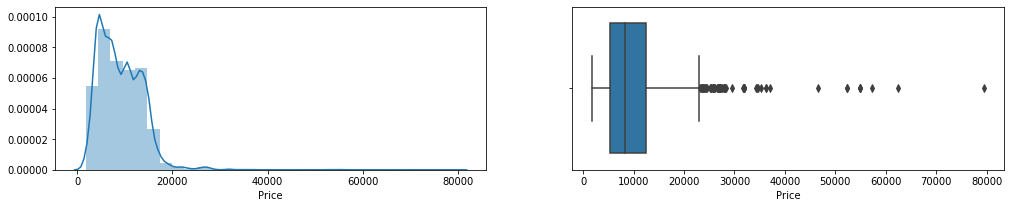

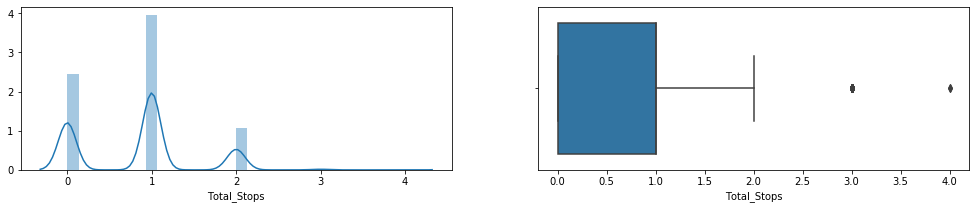

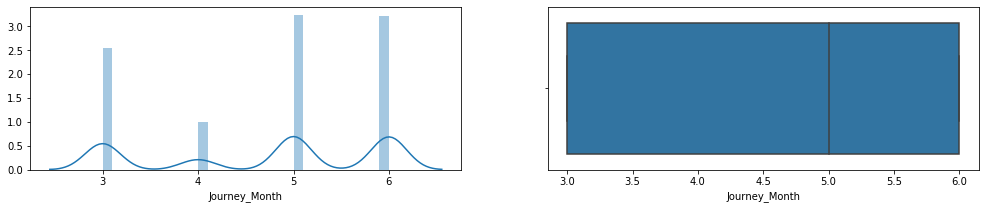

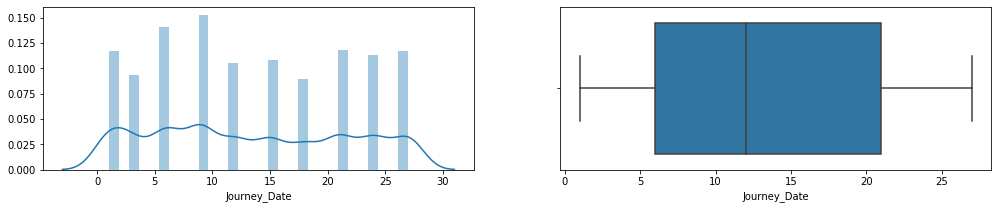

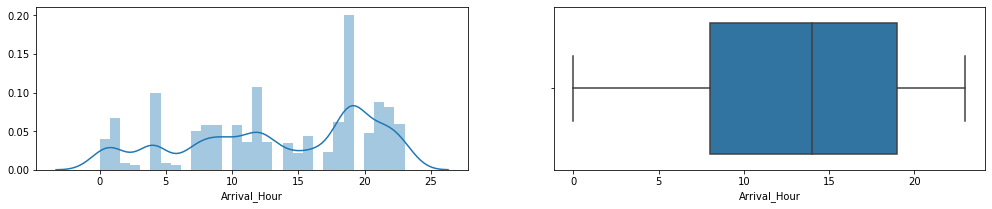

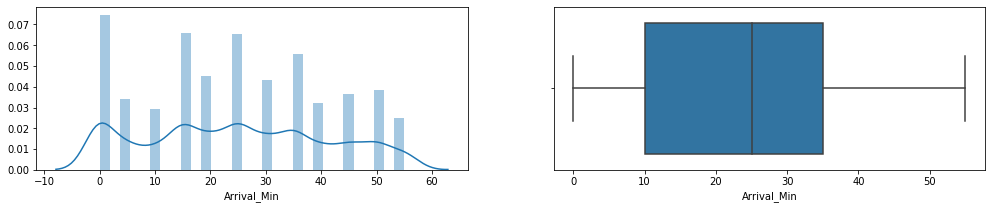

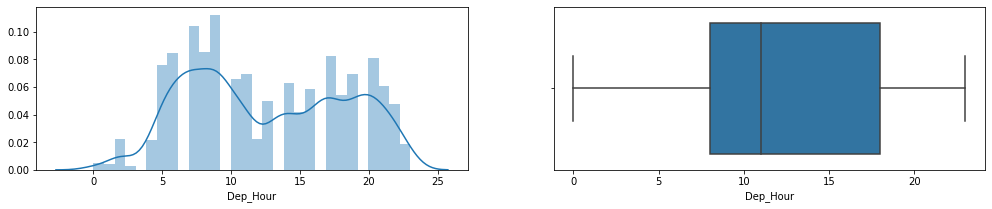

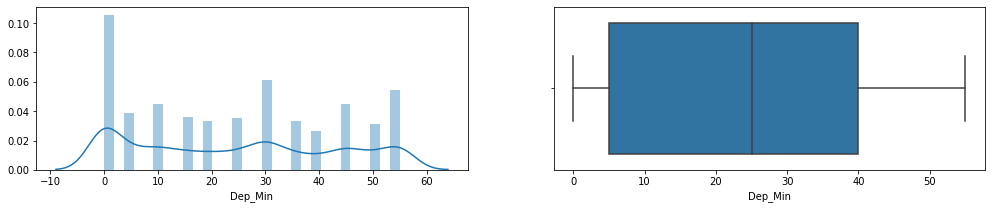

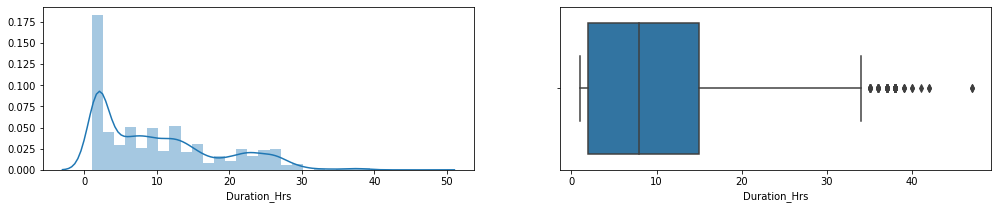

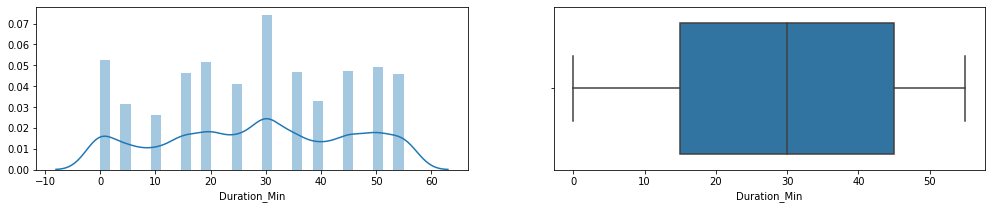

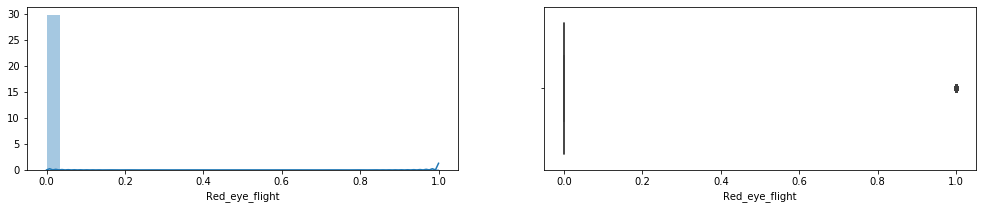

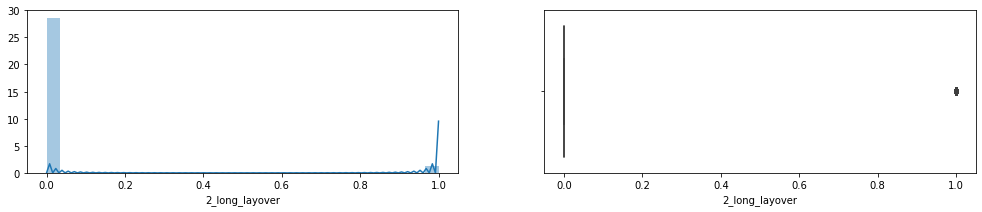

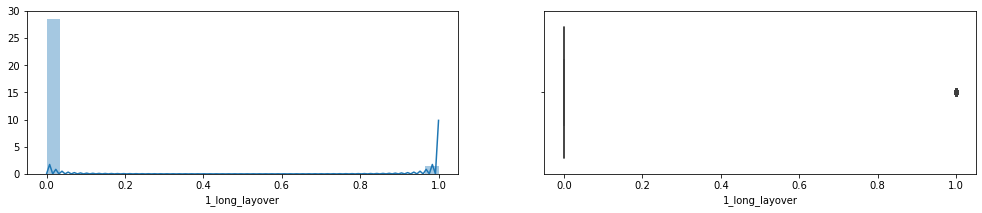

In [45]:
#Univariate analysis of numerical features
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

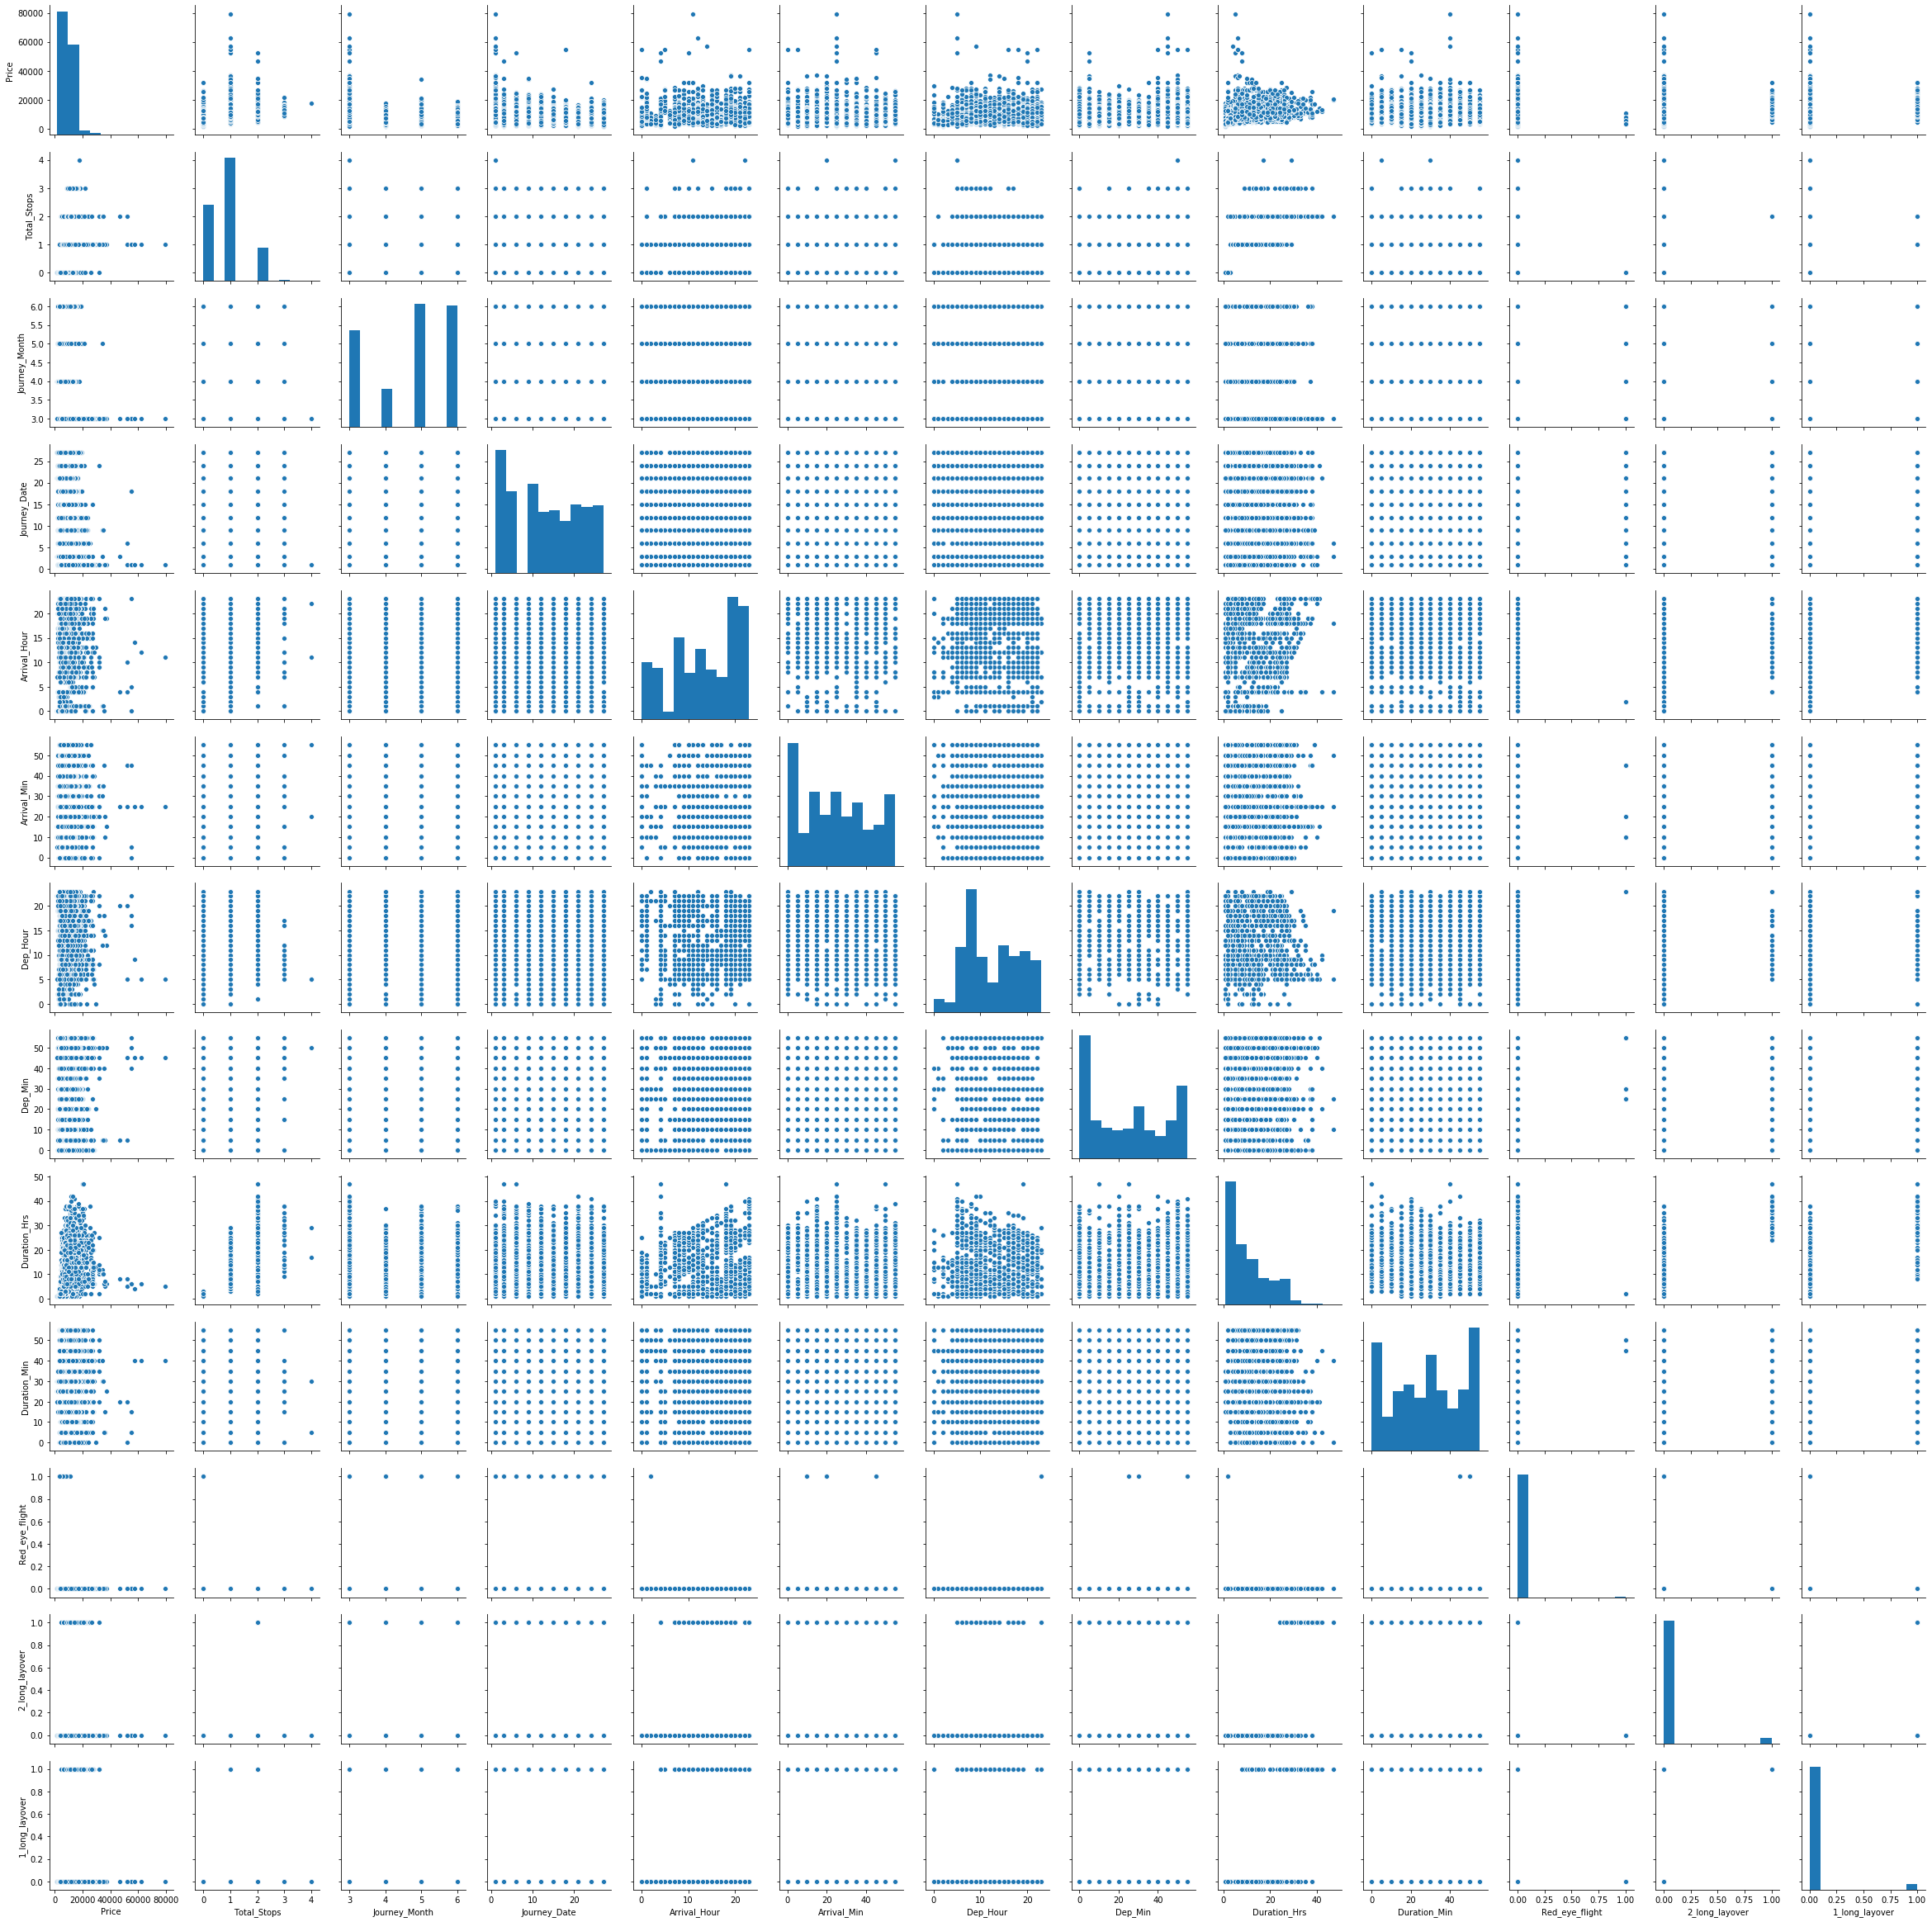

In [46]:
sns.pairplot(df)

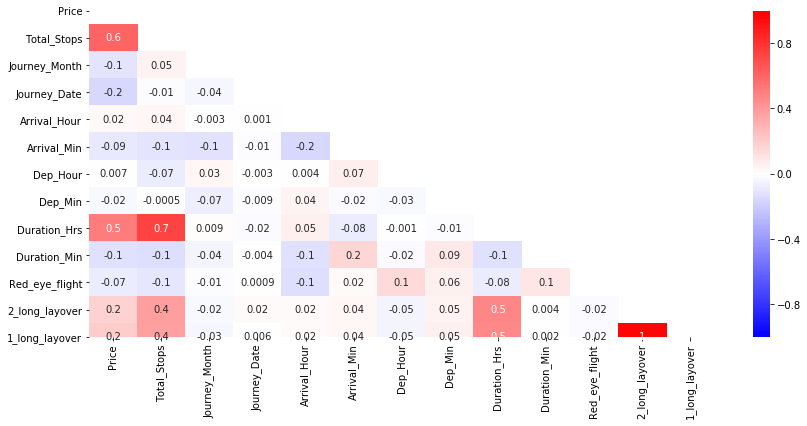

In [47]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True, fmt='.1g', cmap='bwr', mask=np.triu(df.corr()))

Observations:
    1. 2_long_layover can be dropped as it is 100% positively correlated with 1_long_layover.
    2. We see a good correlation between Price and Total_Stops.
    3. Duration_Hrs is highly correlated with 2_long_layover, 1_long_layover, Price and Total_Stops.

In [48]:
df.drop(['2_long_layover'], axis=1, inplace=True)

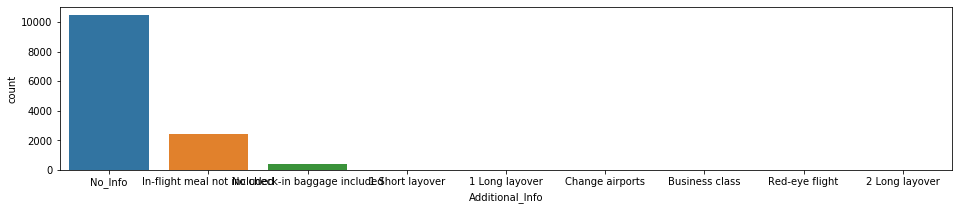

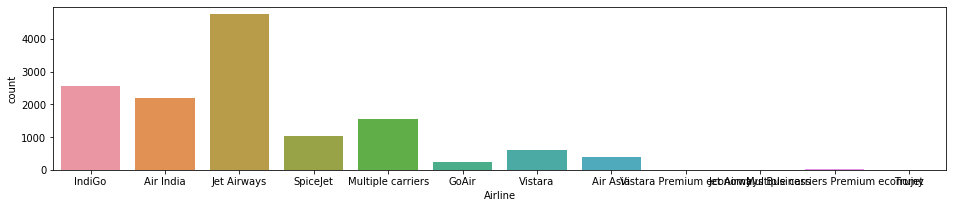

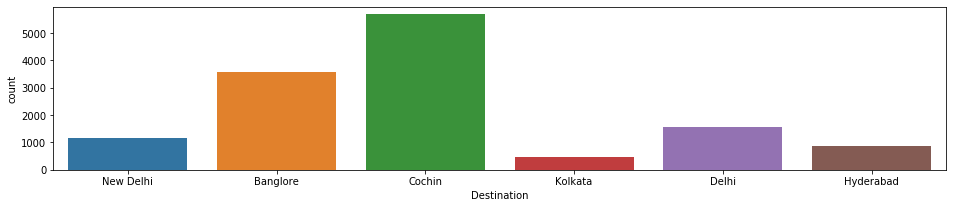

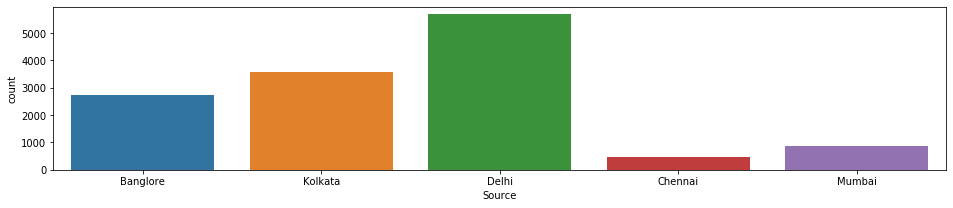

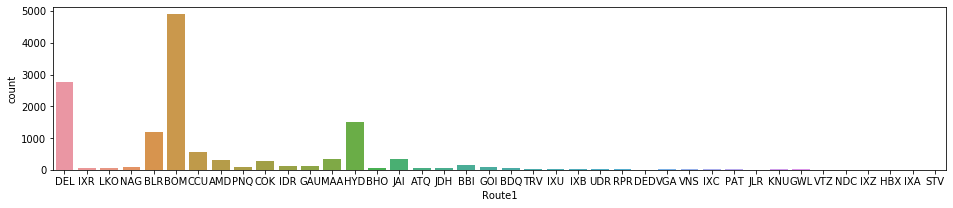

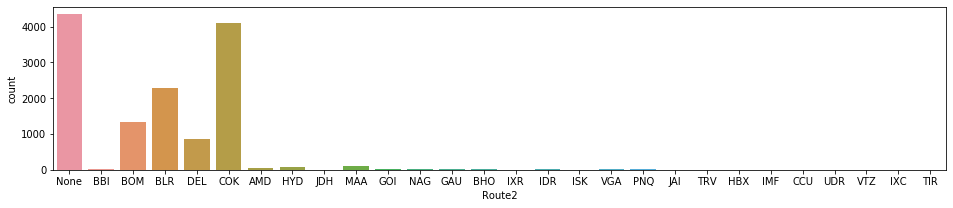

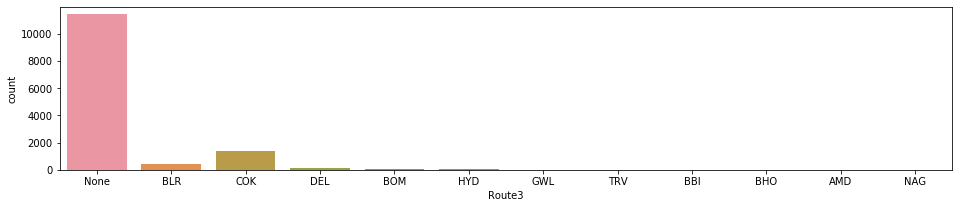

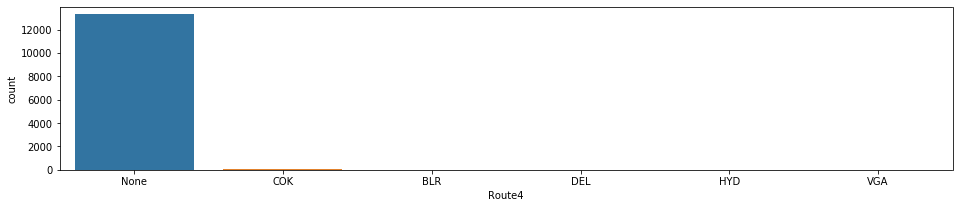

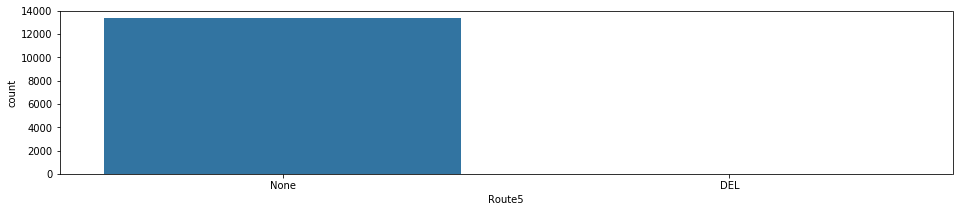

In [49]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

Observations:
    1. We see lot of inconsistency in Additional_Info. We will remove few features after get_dummies.
    2. Jet Airways has the most flights in this dataset.
    3. Majority of the passengers flew from Delhi, whereas the least were from Chennai.
    4. Majority of the passengers travelled to Cochin and Kolkata was the least preferred destination.
    5. Nearly 4300 passengers took non-stop flights.
    6. Approximately, 5000 flights landed in BOM.
    7. Second preferred connection flight was through COK (~ 4000 flights).

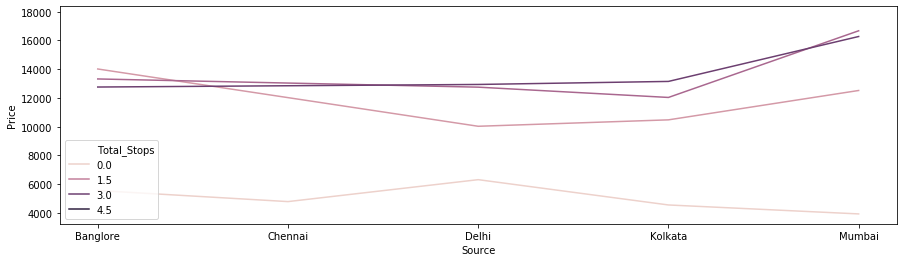

In [50]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Source',y='Price',hue='Total_Stops',data=df, ci=None)

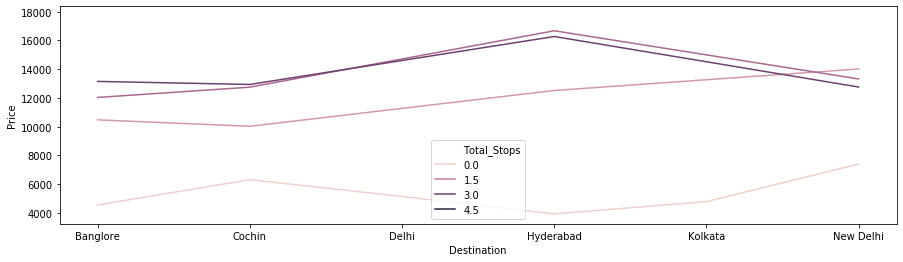

In [51]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Destination',y='Price',hue='Total_Stops',data=df, ci=None)

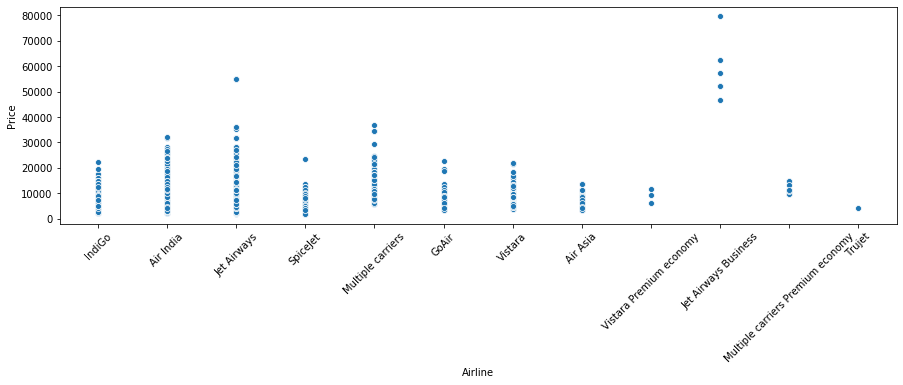

In [52]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=45)
sns.scatterplot(x='Airline',y='Price',data=df)

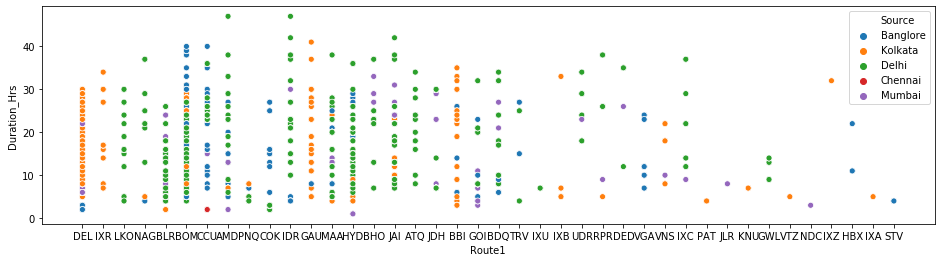

In [53]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Route1', y='Duration_Hrs', data=df, hue='Source')

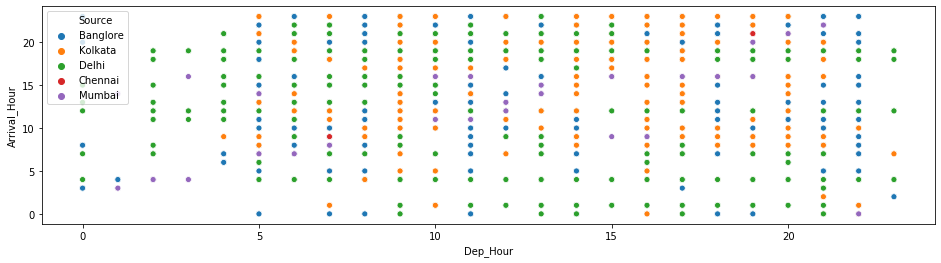

In [54]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Dep_Hour', y='Arrival_Hour', data=df, hue='Source')

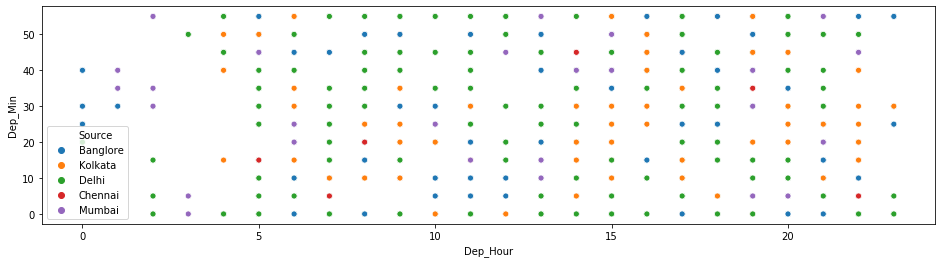

In [55]:
plt.figure(figsize=(16,4))
sns.scatterplot(x='Dep_Hour', y='Dep_Min', data=df, hue='Source')

Text(0, 0.5, '% of Flights')

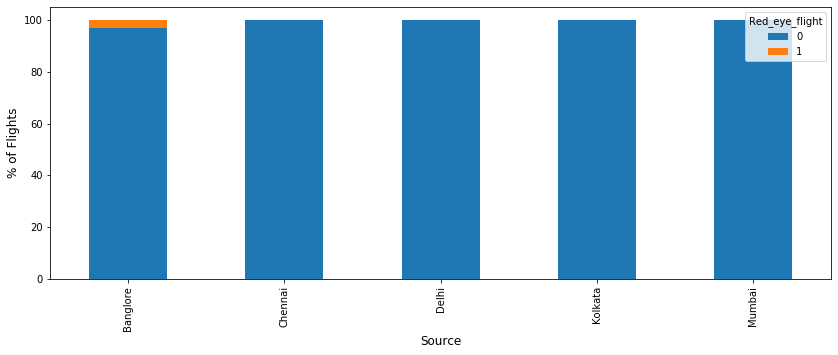

In [56]:
tbl=pd.crosstab(df['Source'], df['Red_eye_flight'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('Source',fontsize=12)
plt.ylabel('% of Flights',fontsize=12)

Text(0, 0.5, '% of Stops')

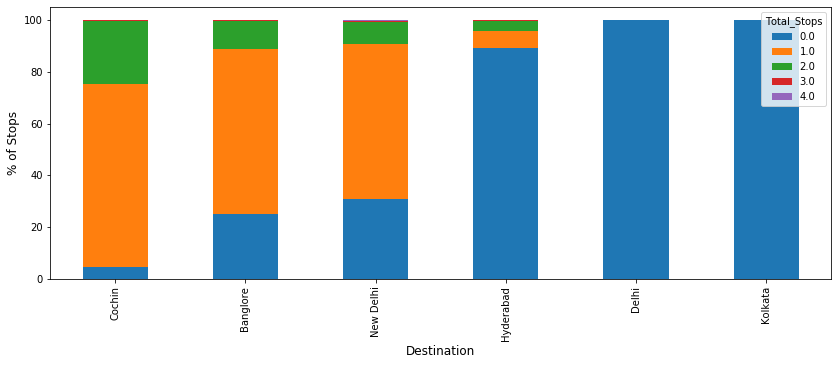

In [57]:
tbl=pd.crosstab(df['Destination'], df['Total_Stops'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('Destination',fontsize=12)
plt.ylabel('% of Stops',fontsize=12)

Text(0, 0.5, '% of 1_long_layover')

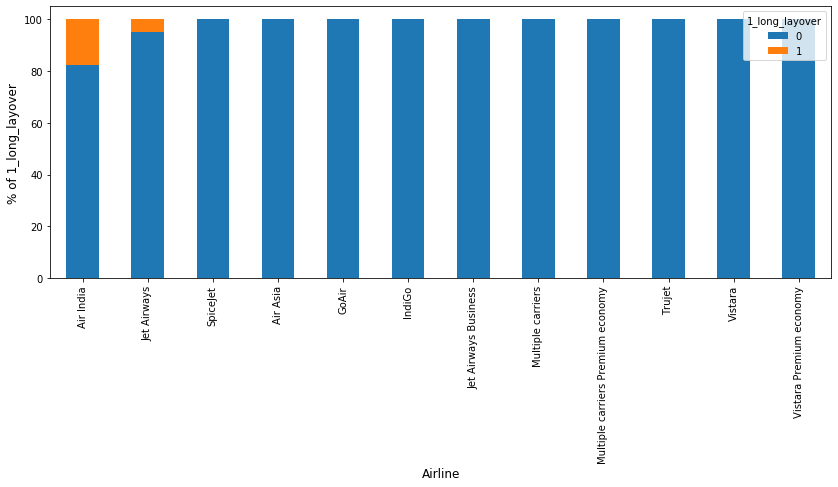

In [58]:
tbl=pd.crosstab(df['Airline'], df['1_long_layover'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('Airline',fontsize=12)
plt.ylabel('% of 1_long_layover',fontsize=12)

In [59]:
df=pd.get_dummies(df)
df.shape

(13351, 132)

In [60]:
# Let's get rid of duplicate columns created by get_dummies.
df.drop(columns=['Additional_Info_1 Long layover', 'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover', 'Additional_Info_No_Info', 'Additional_Info_Red-eye flight'], axis=1, inplace=True)
df.shape

(13351, 127)

In [61]:
df_train = df[0:10682]
df_test = df[10682:].drop(columns=['Price'], axis=1)
x = df_train.drop(columns=['Price'], axis=1)
y = df_train['Price']

In [62]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [63]:
# Instanstiate PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(10682, 10)

### Machine Learning Algorithms

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (8545, 10) | x_test.shape --> (2137, 10) 
y_train.shape --> (8545,) | y_test.shape --> (2137,)


In [65]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test, score):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train, y_train)*100)
    
    print('Accuracy Score :: %0.2f' %(model.score(x_train, y_train)*100))

In [66]:
# Instantiate all models
lreg = LinearRegression()
knr = KNeighborsRegressor()
rr = Ridge()
lr = Lasso()
enr = ElasticNet()
svr = SVR()
dct = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [67]:
all_models={'Linear Regression': lreg,
            'K-Neighbors Regressor': knr,
            'Ridge Regression': rr,
            'Lasso Regression': lr,
            'Elastic Net': enr,
            'Support Vector Regression': svr,
            'Decision Tree Regression': dct,
            'Random Forest Regressor': rf
           }

In [68]:
score, rmse = [], []
for i, j in all_models.items():
    print('-------------------', i, '-------------------')
    models(j, x_train, x_test, y_train, y_test, score)

------------------- Linear Regression -------------------
Accuracy Score :: 47.19
------------------- K-Neighbors Regressor -------------------
Accuracy Score :: 84.92
------------------- Ridge Regression -------------------
Accuracy Score :: 47.19
------------------- Lasso Regression -------------------
Accuracy Score :: 47.19
------------------- Elastic Net -------------------
Accuracy Score :: 46.80
------------------- Support Vector Regression -------------------
Accuracy Score :: 9.33
------------------- Decision Tree Regression -------------------
Accuracy Score :: 99.56
------------------- Random Forest Regressor -------------------
Accuracy Score :: 96.91


In [69]:
pd.DataFrame([all_models.keys(), score], index=['Model', 'Accuracy Score']).T.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
6,Decision Tree Regression,99.5645
7,Random Forest Regressor,96.9102
1,K-Neighbors Regressor,84.9151
0,Linear Regression,47.1867
2,Ridge Regression,47.1867
3,Lasso Regression,47.1867
4,Elastic Net,46.8036
5,Support Vector Regression,9.33255


In [70]:
cv_scores = cross_val_score(dct, x_train, y_train, cv=10)
cv_scores.mean()*100

65.33534643710335

Conclusion:
    1. Support Vector regression is the worst model with 9.3% accuracy.
    2. We could not acheive a good score through cross validation.
    3. Decision Tree Regression gained 99.56% accuracy.

In [71]:
#Exporting model as pkl file
joblib.dump(dct,'dct_Flight_Prediction.pkl')

['dct_Flight_Prediction.pkl']

In [72]:
# predict the value
dct.fit(x_train, y_train)
pred=dct.predict(x_test)
print("Predicted Result Price:",pred)

Predicted Result Price: [16840.  4959.  8452. ...  4991.  9257. 13059.]


In [73]:
df_pred=pd.DataFrame(pred)
df_pred.to_csv('flight_prediction.csv')